# Project 5 -- Atulya Kadur

**TA Help:** 
    
**Collaboration:** 

## Question 1

In [1]:
 myDF <- read.csv("/anvil/projects/tdm/data/election/escaped2020sample.txt", sep="|")

In [3]:
options(jupyter.rich_display = F)

In [4]:
options(repr.matrix.max.cols = 30,repr.matrix.max = 200)

In [7]:
head(myDF)

  CMTE_ID   AMNDT_IND RPT_TP TRANSACTION_PGI IMAGE_NUM    TRANSACTION_TP
1 C00401224 N         YE                     2.020013e+17 24T           
2 C00401224 N         M4     P               2.020042e+17 24T           
3 C00193433 N         YE     P               2.020012e+17 15            
4 C00401224 N         YE                     2.020013e+17 24T           
5 C00401224 N         MY                     2.019073e+17 24T           
6 C00618371 N         Q3     P               2.019102e+17 15            
  ENTITY_TP NAME             CITY         STATE ZIP_CODE EMPLOYER    
1 IND       SOLOMON, VICTOR  CAPE CORAL   FL    33904    RETIRED     
2 IND       MYERS, ELIZABETH SCOTTSVILLE  NY    14546    NOT EMPLOYED
3 IND       HASKINS, GEORGE  HARTSDALE    NY    10530    NOT EMPLOYED
4 IND       KOLBE, NINA      WASHINGTON   DC    20003    SELF        
5 IND       ESSENBERG, PENNY GRAND RAPIDS MI    49534                
6 IND       GIEBEL, BETTY    KISSIMMEE    FL    34744    HOMEMAKER   

In [8]:
head(myDF$TRANSACTION_DT
)

[1]  7112019  3042020 12182019  8302019  3212019  7112019

In [22]:
library(lubridate, warn.conflicts = FALSE)
myDF$newdates <-mdy(myDF$TRANSACTION_DT)

In [11]:
class(myDF$TRANSACTION_DT)

[1] "integer"

In [14]:
class(myDF$newdates)

[1] "Date"

In [15]:
head(myDF$newdates)

[1] "2019-07-11" "2020-03-04" "2019-12-18" "2019-08-30" "2019-03-21"
[6] "2019-07-11"

In [23]:
myDF$TRANSACTION_YR = year(myDF$newdates)

In [24]:
table(myDF$TRANSACTION_YR)


   2002    2010    2015    2016    2017    2018    2019    2020 
      1       1       3       2       3     369 3160207 1518175 

In [25]:
result <- tapply(myDF$TRANSACTION_AMT, myDF$TRANSACTION_YR, sum)

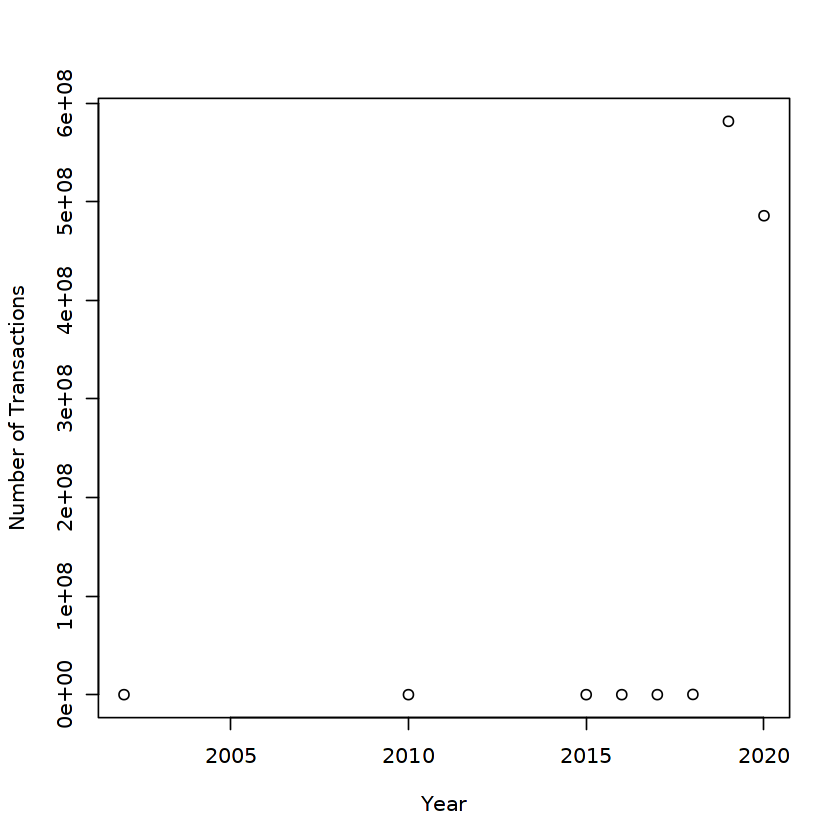

In [8]:
plot( names(result), result, xlab = "Year",ylab="Number of Transactions" )

Markdown notes and sentences and analysis written here.

## Question 2

In [ ]:
# code here
my2020DF <- subset(myDF,TRANSACTION_YR == "2020")

In [6]:
dim(my2020DF)

[1] 1518175      23

In [ ]:
my2020DF$TRANSACTION_MONTH = month(my2020DF$newdates)

In [10]:
head(my2020DF)

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,...,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID,newdates,TRANSACTION_YR,TRANSACTION_MONTH
,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<date>,<dbl>,<dbl>
2,C00401224,N,M4,P,2.020042e+17,24T,IND,"MYERS, ELIZABETH",SCOTTSVILLE,NY,...,39,C00696948,SA11AI_216676150,1402724,,EARMARKED FOR BERNIE 2020 (C00696948),4.05142e+18,2020-03-04,2020,3
9,C00523936,N,M5,P,2.020051e+17,15,IND,"DICE, KEVIN",SOMERSET,NJ,...,58,,202004178176-2009,1404664,,,4.05072e+18,2020-04-17,2020,4
11,C00369033,N,12P,P2020,2.020022e+17,15E,IND,"SMELLEY, KAY MS.",CYPRESS,TX,...,25,C00694323,SA11A.243981,1384130,,EARMARKED FROM WINRED,4.02212e+18,2020-02-11,2020,2
12,C00401224,N,M4,P,2.020042e+17,24T,IND,"WELLMAN, NANCY",RIVERDALE,NY,...,8,C00703975,SA11AI_219941849,1402724,,EARMARKED FOR BIDEN FOR PRESIDENT (C00703975),4.05142e+18,2020-03-16,2020,3
13,C00003418,N,M4,P,2.020042e+17,15,IND,"WARD, KATHLEEN A. MRS.",PALOS PARK,IL,...,100,,SA11A.86809647,1402841,,,4.04272e+18,2020-03-02,2020,3
14,C00696948,N,M2,P2020,2.020022e+17,15E,IND,"GIBLIN, KATHLEEN",SEATTLE,WA,...,5,C00401224,16168126,1384482,,* EARMARKED CONTRIBUTION: SEE BELOW,4.03042e+18,2020-01-21,2020,1


In [12]:
tapply(my2020DF$TRANSACTION_AMT, my2020DF$TRANSACTION_MONTH, sum)

1         2         3         4         5        12 
 69236956 308473457  92913000  14690773    483017      3300

In [13]:
result <- tapply(my2020DF$TRANSACTION_AMT, my2020DF$TRANSACTION_MONTH, sum)

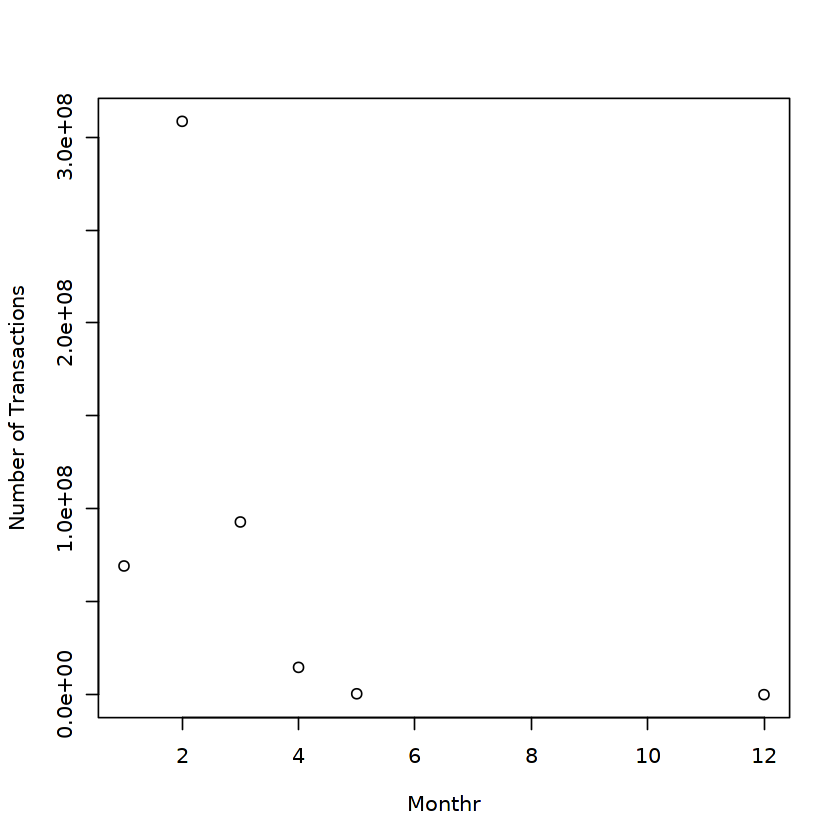

In [15]:
plot( names(result), result, xlab = "Monthr",ylab="Number of Transactions" )

Markdown notes and sentences and analysis written here.

## Question 3

In [5]:
# code here
tail(sort(tapply(myDF$TRANSACTION_AMT, myDF$NAME, sum)))

            REPUBLICAN GOVERNORS ASSOCIATION 
                                     3300000 
UNITED BROTHERHOOD OF CARPENTERS AND JOINERS 
                                     3936291 
                                  YASS, JEFF 
                                     6047000 
   EVERYTOWN FOR GUN SAFETY ACTION FUND, INC 
                                    10005656 
                                 STEYER, TOM 
                                    24796081 
                       BLOOMBERG, MICHAEL R. 
                                   275751211 

In [6]:
tail(sort(tapply(myDF$TRANSACTION_AMT, myDF$STATE, sum)),n=5)

       DC        FL        TX        CA        NY 
 37280905  44118779  63719103 151842431 364883860 

In [15]:
tail(sort(tapply(myDF$TRANSACTION_AMT, myDF$ZIP_CODE, sum)),n=10)

200361806 101543302     78209     20006 200012133 190041188 101634184 941040626 
  2500100   2603700   3357597   3763519   3972934   5014000  10005656  24794281 
101501101 101501060 
 64868135 210077476 

Markdown notes and sentences and analysis written here.

## Question 4

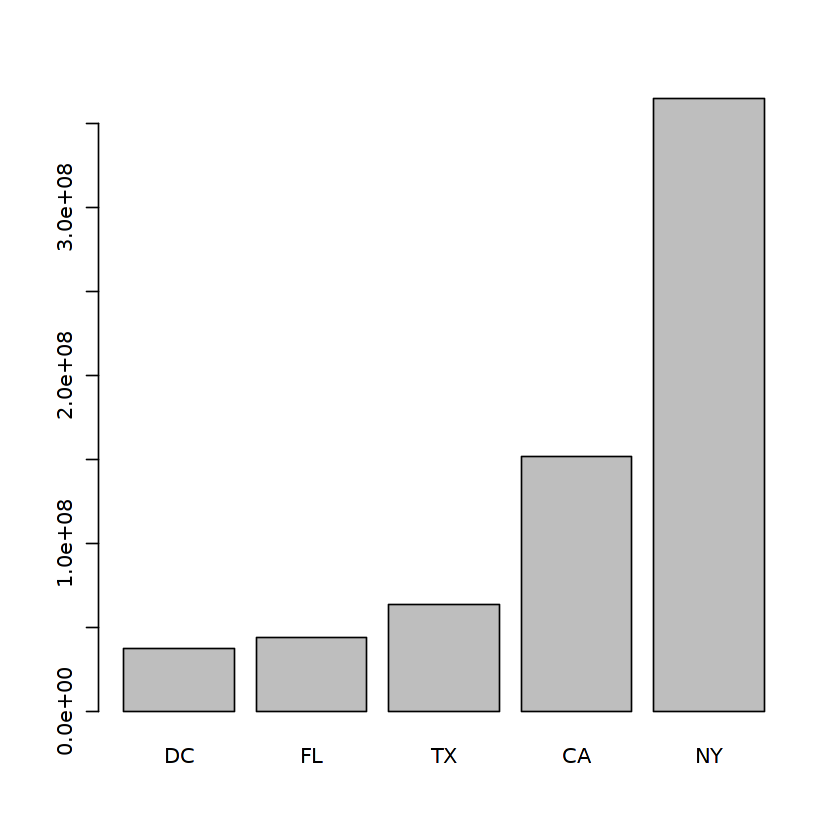

In [12]:
# code here
barplot(tail(sort(tapply(myDF$TRANSACTION_AMT, myDF$STATE, sum)),n=5))


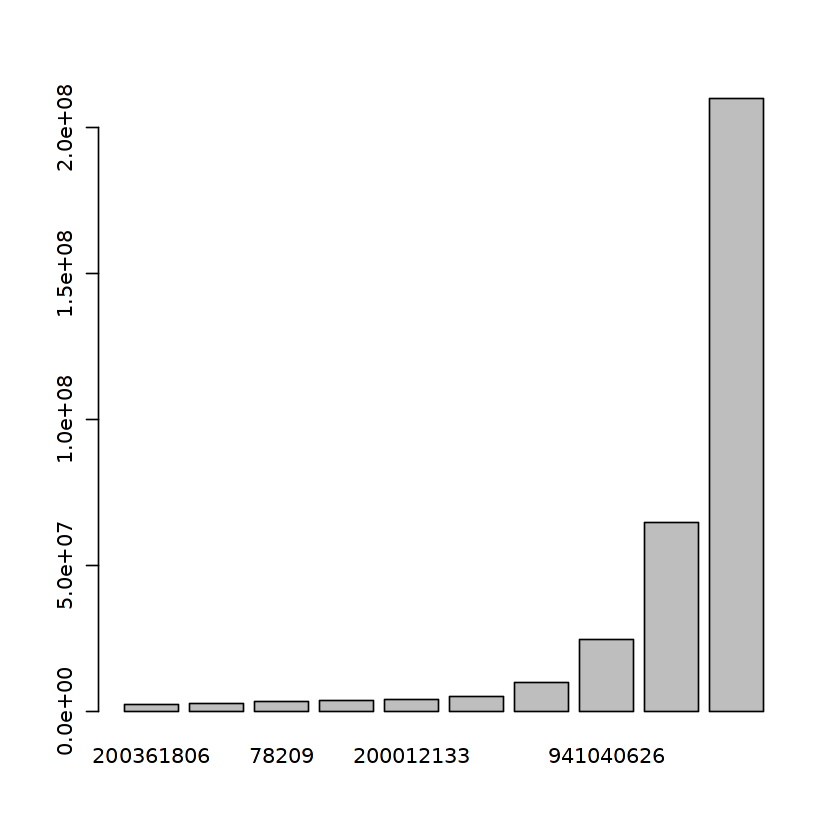

In [13]:
barplot(tail(sort(tapply(myDF$TRANSACTION_AMT, myDF$ZIP_CODE, sum)),n=10))


Markdown notes and sentences and analysis written here.

## Question 5

In [18]:
# code here
tail(sort(tapply(myDF$TRANSACTION_AMT, myDF$CITY, sum)),n=10)


      SEATTLE       ATLANTA        BOSTON       CHICAGO        DALLAS 
      7125082       7165364       8311422      11043133      11732206 
      HOUSTON   LOS ANGELES    WASHINGTON SAN FRANCISCO      NEW YORK 
     12476967      14146116      37368049      38706933     331601253 

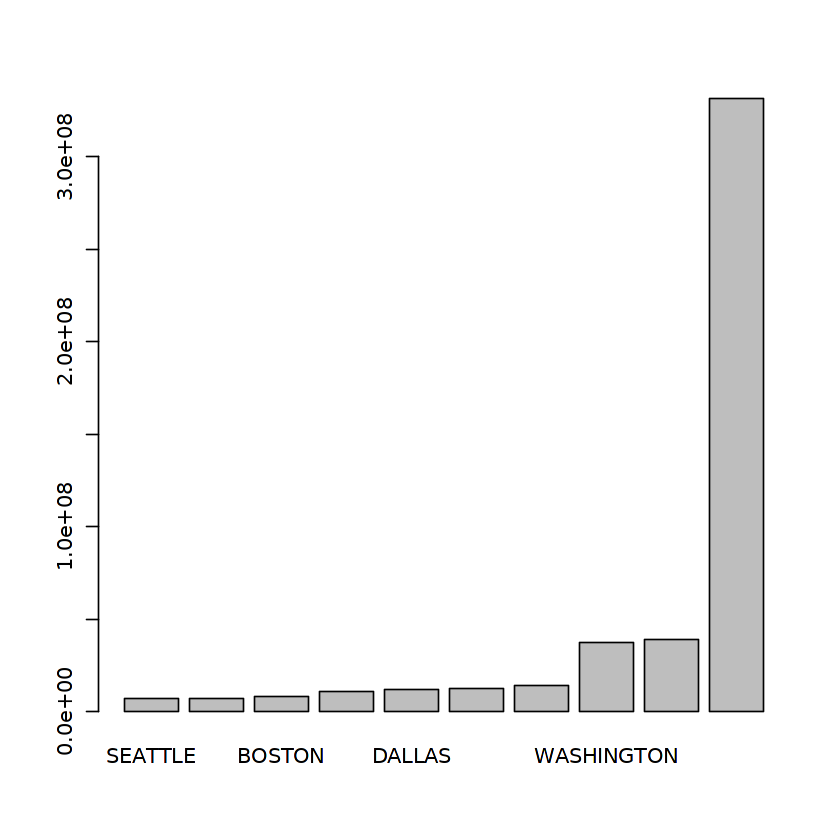

In [19]:
barplot(tail(sort(tapply(myDF$TRANSACTION_AMT, myDF$CITY, sum)),n=10))

#

**Though there are states with the greatest amount donated. Within these states, there are certain cities that tend to contribute to most of the values. To the numbers that the state of New York, California, Texas, and DC. The main cities of the state provide much of the funding. This will have a correlation to the industries dominating those regions and the political scene present in those cities. There are also outlier cities and states. Florida, Atlanta, and Boston all provide high contributions; however, they are not represent equally across both graphs. This means that in Florida there might be an even amount of donations from wealth individuals and regular citizens. The same idea applies to Atlanta and Boston. Even though they are high contributing regions, there is not great representation from the rest of the state.**

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.